## Tridge_data scientist test
### written by hyunho park

본 과제를 진행함에 앞서, 보고서는 아래와 같은 순서대로 작성되었습니다.

### 0. EDA

### 1. 문제 

#### (1) 데이터 생성 관점

 1) Problems through the data quality
 2) How discovered the problems
 3) How you would resolve the problems

#### (2) 데이터 이상치 관점
 1) Problems through the data quality
 2) How discovered the problems
 3) How you would resolve the problems

### 2. 해결방안

 4) How you would prevent the same problems in the future

과제를 진행함에 앞서서, 데이터 전처리 및 분석에 필요한 library를 import 합니다.

In [1]:
# Import library

import numpy as np
import pandas as pd
import datetime as date
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

df_agr = pd.read_excel('../2022.04/Tridge_Data_Science_Squad_Assignment_220331.xlsx', sheet_name= 1)

In [2]:
df_agr.head()

,product_id,2019-01-07 00:00:00,2019-01-14 00:00:00,2019-01-21 00:00:00,2019-01-28 00:00:00,2019-02-04 00:00:00,2019-02-11 00:00:00,2019-02-18 00:00:00,2019-02-25 00:00:00,2019-03-04 00:00:00,...,2022-01-24 00:00:00,2022-01-31 00:00:00,2022-02-07 00:00:00,2022-02-14 00:00:00,2022-02-21 00:00:00,2022-02-28 00:00:00,2022-03-07 00:00:00,2022-03-14 00:00:00,2022-03-21 00:00:00,2022-03-28 00:00:00
0,1,233000.0,233000.0,233000.0,233000.0,233000.0,233000.0,233000.0,233000.0,233000.0,...,223000.0,223000.0,223000.0,223000.0,223000.0,223000.0,223000.0,223000.0,223000.0,NaN
1,2,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,...,713000.0,713000.0,713000.0,713000.0,713000.0,713000.0,713000.0,713000.0,713000.0,NaN
2,3,245000.0,245000.0,245000.0,245000.0,245000.0,245000.0,245000.0,245000.0,245000.0,...,220000.0,220000.0,220000.0,220000.0,220000.0,220000.0,220000.0,220000.0,220000.0,NaN
3,4,230000.0,230000.0,230000.0,230000.0,230000.0,230000.0,230000.0,230000.0,230000.0,...,217000.0,217000.0,213000.0,213000.0,213000.0,215250.0,216000.0,216000.0,216000.0,NaN
4,5,440000.0,440000.0,440000.0,440000.0,440000.0,440000.0,440000.0,440000.0,440000.0,...,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,NaN


데이터 확인 결과, dataframe 안에는 1개의 product_id와 170개의 시계열 데이터로 구성되어 있습니다.

product_id로는 농산물을 특정할 수 없으며, 각 상품은 상이합니다.

전체 상품은 2,580건으로 구성되어 있습니다.

In [3]:
# column이 datetime type이기에, rename 진행

column_lst = df_agr.columns.tolist()[1:]
for i in column_lst:
    df_agr.rename(columns = {i : i.strftime('%Y-%m-%d')}, inplace = True)

In [4]:
df_agr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Columns: 170 entries, product_id to 2022-03-28
dtypes: float64(169), int64(1)
memory usage: 3.3 MB


데이터 내의 결측치를 확인 결과, 2,136개의 상품에서 결측치가 있음을 확인했습니다.

In [5]:
# data 내의 결측치 확인

sum(df_agr.isnull().sum(1) > 0)

2136

결측치를 포함한 상품이 82%에 해당되어, 결측치 개수를 계산하기 위해 새로운 column에 생성했습니다.

In [6]:
# 확인 결과, dataframe에 결측치 개수를 새로운 column으로 생성

df_agr['null_data'] = df_agr.isnull().sum(1)

In [7]:
df_agr.head()

,product_id,2019-01-07,2019-01-14,2019-01-21,2019-01-28,2019-02-04,2019-02-11,2019-02-18,2019-02-25,2019-03-04,...,2022-01-31,2022-02-07,2022-02-14,2022-02-21,2022-02-28,2022-03-07,2022-03-14,2022-03-21,2022-03-28,null_data
0,1,233000.0,233000.0,233000.0,233000.0,233000.0,233000.0,233000.0,233000.0,233000.0,...,223000.0,223000.0,223000.0,223000.0,223000.0,223000.0,223000.0,223000.0,NaN,1
1,2,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,...,713000.0,713000.0,713000.0,713000.0,713000.0,713000.0,713000.0,713000.0,NaN,1
2,3,245000.0,245000.0,245000.0,245000.0,245000.0,245000.0,245000.0,245000.0,245000.0,...,220000.0,220000.0,220000.0,220000.0,220000.0,220000.0,220000.0,220000.0,NaN,1
3,4,230000.0,230000.0,230000.0,230000.0,230000.0,230000.0,230000.0,230000.0,230000.0,...,217000.0,213000.0,213000.0,213000.0,215250.0,216000.0,216000.0,216000.0,NaN,1
4,5,440000.0,440000.0,440000.0,440000.0,440000.0,440000.0,440000.0,440000.0,440000.0,...,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,NaN,1


In [8]:
# 결측치 개수 파악 진행

min_ = min(df_agr['null_data'])
max_ = max(df_agr['null_data'])

null_hash = {}

for i in range(min_, max_+1):
    null_count = df_agr['product_id'][df_agr['null_data'] == i].count()
    null_hash[i] = null_count
    
    if null_count != 0 and i < 10:
        print('결측치가 {}개인 농수산품은 {}개'.format(i, null_count))

결측치가 0개인 농수산품은 444개
결측치가 1개인 농수산품은 630개
결측치가 2개인 농수산품은 122개
결측치가 3개인 농수산품은 7개
결측치가 4개인 농수산품은 1개
결측치가 5개인 농수산품은 1개
결측치가 7개인 농수산품은 5개
결측치가 9개인 농수산품은 1개


In [9]:
# 확인 결과, 전체 데이터 2,580개에서 약 17%만이 결측치가 없는 상품은 444개에 해당되며,
# tridge는 농수산물 가격을 종속 변수로 여러 모델을 훈련하여, 고객, 정보 이용자 등에게 정보를 제공하기에
# 정보의 신뢰성을 높이는 방향으로, 전체 데이터에서 5% 미만의 결측치 (8개) 이하인 데이터만 활용하기로 결정했습니다.
# 170개 시계열 데이터에서 8개 이하의 결측치만 가지는 데이터를 활용

count = 0
i= 0 

while i <= 8:
    count += null_hash[i]
    i += 1
    
print('결측치가 8개 이하인 농산물 데이터의 개수: {}개'.format(count))
print('전체 데이터 중에서 활용하는 비율: {:.2f}%'.format(count/len(df_agr)*100))

결측치가 8개 이하인 농산물 데이터의 개수: 1210개
전체 데이터 중에서 활용하는 비율: 46.90%


위 과정을 통해 현재 제공된 데이터의 품질 관련해서 아래와 같은 문제점을 판단했습니다.

### (1) 데이터 생성 관점

#### 1) Problems through the data quality 

데이터 생성 관점에서 누락되지 않고 전부 입력된 상품은 444개, 17%에 해당하며, 결측치가 데이터 중에서 5% 미만 (8개 이하)인 상품은 1,210개, 47%에 해당합니다. 전체 상품 중에서 절반 이상이 누락된 정보가 있기에 이로 인해 데이터 품질의 저하를 확인했습니다.

#### 2) How discovered the problems

상품 가격 데이터는 point, tabular data로 데이터 유/무로 결측 여부를 확인할 수 있습니다. 이에 따라, EDA 과정에서 결측치 수정에서 확인할 수 있었습니다. 

#### 3) How you would resolve the problems

결측치는 전후로 3주 데이터, 7주 간의 평균값으로 조정했습니다. (n번째 결측치: n-3 ~ n ~ n+3)
이는 데이터의 변동성을 최대한 줄이기 위함입니다.

이때, 수집 기간에 따라 7주 간의 데이터를 수집하지 못 하는 경우에는 이전 또는 이후의 기간을 조정하였습니다.

In [10]:
# 1. 데이터 생성 관점
# 결측치는 시계열 데이터 특성에 따라 큰 변동이 없을 것이라 가정하여, 평균 데이터 활용

df_rev = df_agr[df_agr['null_data'] < 9]
df_rev.reset_index(drop = True, inplace = True)

# 결측치는 최근 1개월 이내의 데이터의 평균(mean)으로 계산

for i in df_rev['product_id']:
    row_ = df_rev[df_rev['product_id'] == i].index[0]
    _, idx_col = np.where(df_rev.iloc[row_:row_+1].isnull() == True)
    
    for j in idx_col:
        mean_ = df_rev.iloc[row_, 1 if j == 0  else j if j < 4 else j - 3
                                : -1 if j+3 >= 171 else j+3] # 171은 column 개수
        df_rev.iloc[row_, j] = np.mean(mean_)

# 결측치 전처리 이후에, 나머지 결측치는 연속적으로 값이 없는 데이터로
# 나머지는 데이터가 입력된 가장 최신 데이터를 활용

df_rev.fillna(np.where(df_rev.isnull() == False)[0][1], inplace = True)        
        
df_rev = round(df_rev, 1)

df_rev.head()

,product_id,2019-01-07,2019-01-14,2019-01-21,2019-01-28,2019-02-04,2019-02-11,2019-02-18,2019-02-25,2019-03-04,...,2022-01-31,2022-02-07,2022-02-14,2022-02-21,2022-02-28,2022-03-07,2022-03-14,2022-03-21,2022-03-28,null_data
0,1,233000.0,233000.0,233000.0,233000.0,233000.0,233000.0,233000.0,233000.0,233000.0,...,223000.0,223000.0,223000.0,223000.0,223000.0,223000.0,223000.0,223000.0,223000.0,1
1,2,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,...,713000.0,713000.0,713000.0,713000.0,713000.0,713000.0,713000.0,713000.0,713000.0,1
2,3,245000.0,245000.0,245000.0,245000.0,245000.0,245000.0,245000.0,245000.0,245000.0,...,220000.0,220000.0,220000.0,220000.0,220000.0,220000.0,220000.0,220000.0,220000.0,1
3,4,230000.0,230000.0,230000.0,230000.0,230000.0,230000.0,230000.0,230000.0,230000.0,...,217000.0,213000.0,213000.0,213000.0,215250.0,216000.0,216000.0,216000.0,216000.0,1
4,5,440000.0,440000.0,440000.0,440000.0,440000.0,440000.0,440000.0,440000.0,440000.0,...,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,1


In [11]:
# 결측치 개수 확인 결과
# 결측치 보정 작업 완료

print('결측치 개수: {}건'.format(df_rev.isnull().all().sum()))

결측치 개수: 0건


#### 4) How you would prevent the same problems in the future

데이터 생성 관점에서 누락된 데이터는 크롤링, 수기 입력 등 입력 행위의 누락으로 판단됩니다.
이에 따라, 데이터 입력 주기에도 입력되지 않은 경우에는 alarm, warning을 통해 입력이 누락되지 않도록 action을 유도해야 합니다.

### 그리고 본격적으로 데이터 구성을 살펴보겠습니다.

In [12]:
# 2. 데이터 anamoly detection
df_rev.drop('null_data', axis = 1, inplace = True)
df_rev.head()

,product_id,2019-01-07,2019-01-14,2019-01-21,2019-01-28,2019-02-04,2019-02-11,2019-02-18,2019-02-25,2019-03-04,...,2022-01-24,2022-01-31,2022-02-07,2022-02-14,2022-02-21,2022-02-28,2022-03-07,2022-03-14,2022-03-21,2022-03-28
0,1,233000.0,233000.0,233000.0,233000.0,233000.0,233000.0,233000.0,233000.0,233000.0,...,223000.0,223000.0,223000.0,223000.0,223000.0,223000.0,223000.0,223000.0,223000.0,223000.0
1,2,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,...,713000.0,713000.0,713000.0,713000.0,713000.0,713000.0,713000.0,713000.0,713000.0,713000.0
2,3,245000.0,245000.0,245000.0,245000.0,245000.0,245000.0,245000.0,245000.0,245000.0,...,220000.0,220000.0,220000.0,220000.0,220000.0,220000.0,220000.0,220000.0,220000.0,220000.0
3,4,230000.0,230000.0,230000.0,230000.0,230000.0,230000.0,230000.0,230000.0,230000.0,...,217000.0,217000.0,213000.0,213000.0,213000.0,215250.0,216000.0,216000.0,216000.0,216000.0
4,5,440000.0,440000.0,440000.0,440000.0,440000.0,440000.0,440000.0,440000.0,440000.0,...,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0


임의의 product_id 1681에 대한 분석


Text(0.5, 0, 'product_id 1681 graph')

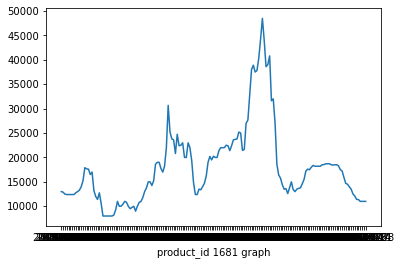

In [13]:
# 무작위 숫자를 바탕으로 그래프 확인

rand_x = np.random.random_integers(low=1, high=1210)
print('임의의 product_id {}에 대한 분석'.format(df_rev['product_id'][rand_x]))

x = df_rev.iloc[rand_x, 1:]

plt.plot(x)
plt.xlabel('product_id {} graph'.format(df_rev['product_id'][rand_x]))

임의의 product_id 1681에 대한 분석


Text(0.5, 0, 'product_id 1681 graph')

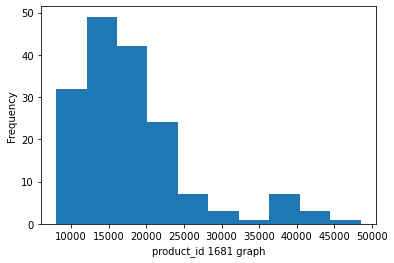

In [14]:
print('임의의 product_id {}에 대한 분석'.format(df_rev['product_id'][rand_x]))

x.plot.hist()
plt.xlabel('product_id {} graph'.format(df_rev['product_id'][rand_x]))

In [15]:
# 신뢰구간 99%로 해당 값을 벗어난 것을 Anomaly로 판단

def cl_99(inp):
    mu, std = inp.mean(), inp.std()
    
    max99 = mu + 3 * std
    min99 = mu - 3 * std
    return min99, max99

In [16]:
min99, max99 = cl_99(x)
outlier_x = []

for i in x:
    if i < min99 or i > max99:
        outlier_x.append(i)

print('Anomaly 판단: {}건'.format(len(outlier_x)))
print('전체 데이터: {}건'.format(len(x)))
print('총 개수 대비 Anomaly 비율: {:.2f}%'.format(len(outlier_x) / len(x)*100))

Anomaly 판단: 3건
전체 데이터: 169건
총 개수 대비 Anomaly 비율: 1.78%


In [17]:
# 선정한 1,210개 데이터 중에서 결측치 건수를 파악해보겠습니다.

def anomaly_detection(dataframe):
    df_temp = dataframe.iloc[:, 1:].copy()

    for i in range(len(dataframe)):
        x = dataframe.iloc[i, 1:]
        min99, max99 = cl_99(x)
        hash_map = {}
    
        for j in x.keys():
            if x[j] < min99 or x[j] > max99:
                hash_map[j] = x[j] 
                
        # 이상치 개수 파악
        globals()['anomaly_' + str(dataframe['product_id'][i])] = df_temp.loc[i, list(hash_map)]
        
anomaly_detection(df_rev)

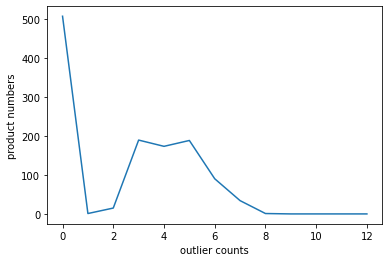

In [18]:
anomaly_count = {}

for i in range(len(df_rev)):
    count = len(globals() ['anomaly_' + str(df_rev['product_id'][i])])
    if count in anomaly_count:
        anomaly_count[count] += 1
    else:
        anomaly_count[count] = 1
        
x = anomaly_count.values()

plt.plot(x)
plt.xlabel('outlier counts')
plt.ylabel('product numbers')
plt.show()

확인 결과, 이상치가 의심되는 데이터를 찾았습니다. 

위 과정을 통해 현재 제공된 데이터의 품질을 향상시킬 수 있는 점을 판단했습니다.

### (2) 데이터 anomaly 관점

#### 1) Problems through the data quality

데이터 품질 관점에서 abnormal(비정상, 이상치, 특이치)을 탐지하는 게 중요하며, 현재 데이터 내에는 abnormal로 의심되는 데이터가 상당수 존재함을 확인할 수 있습니다. 위 데이터의 특징을 파악하는 것이 데이터의 품질 향상에 중요한 요소입니다. 그래서 abnormal data로 의심되는 데이터를 확인해보겠습니다.

#### 2) How discovered the problems

신뢰구간 99%를 벗어나는 데이터는 통계적으로 이상치로 판단할 수 있기에, 각 가격 데이터별로 신뢰구간을 벗어나는 데이터를 검토했습니다.

#### 3) How you would resolve the problems
가격 데이터는 시계열 데이터로 주기성, 계절성 등으로 인해 변동이 나타나기에, 이를 보다 확인할 수 있는 변동률(%)로 추가적으로 검토해보겠습니다.

In [19]:
# 전주 대비 가격 변동률(%)을 새로운 변수로 설정

lst = df_rev.columns[1:]
df_new = pd.DataFrame()
df_new['product_id'] = df_rev['product_id']

for i in range(len(lst) - 1):
    # 변동률= (기준시점 지수 - 비교시점 지수) ÷ 비교시점 지수 × 100
    df_new[i] = (df_rev[lst[i+1]] - df_rev[lst[i]]) / df_rev[lst[i]]

df_new = round(df_new, 5)

df_new.head()

,product_id,0,1,2,3,4,5,6,7,8,...,158,159,160,161,162,163,164,165,166,167
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.00391,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,-0.01843,0.0,0.0,0.01056,0.00348,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0


임의의 product_id 1681에 대한 분석


Text(0.5, 0, 'product_id 1681 graph')

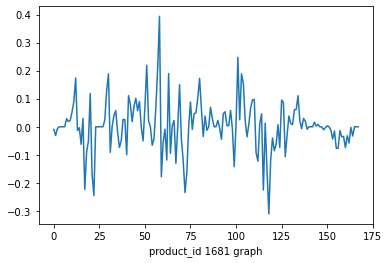

In [20]:
# 무작위 슛자를 바탕으로 그래프 확인
# 위에서 검토한 숫자와 동일하게 그래프 작성

print('임의의 product_id {}에 대한 분석'.format(df_new['product_id'][rand_x]))

y = df_new.iloc[rand_x, 1:]
plt.plot(y)
plt.xlabel('product_id {} graph'.format(df_new['product_id'][rand_x]))

In [21]:
min99, max99 = cl_99(y)
outlier_y = []

for i in y:
    if i < min99 or i > max99:
        outlier_y.append(i)

print('전처리 이후, 이상치 판단: {}건'.format(len(outlier_y)))
print('전체 데이터: {}건'.format(len(y)))
print('총 개수 대비 이상치 비율: {:.2f}%'.format(len(outlier_y) / len(y)*100))

전처리 이후, 이상치 판단: 2건
전체 데이터: 168건
총 개수 대비 이상치 비율: 1.19%


전주 대비 가격 변동률(%)을 새로운 변수로 설정하여, anomaly를 감지하였으며, 가격 변수를 활용했을 때보다 변동률로 판단했을때 anomaly를 추가적으로 감지했습니다.

추가적으로 시계열 데이터는 추세(trend), 계절설(seasonal) 그리고 잔차(residual) 특성을 살펴봐야 되며, 위 데이터에서도 STL 전처리 후 이를 확인해보겠습니다.

임의의 product_id 1681에 대한 분석


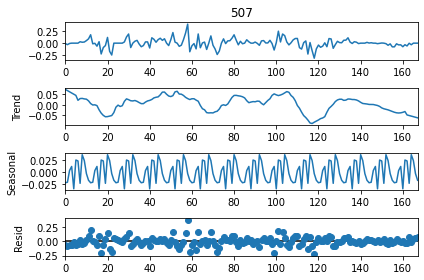

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 계절적 성분 분기별(12주) 가정
# multiple decomposition는 시간이 지남에 따라, Trend가 상승함에 따라 변동폭이 증가하지만
# 현재 데이터에서는 trend에 따라 변동폭이 증감함을 확인하기 어려워, additive decomposition는 사용함

result = seasonal_decompose(df_new.iloc[rand_x, 1:], model='additive', two_sided=True, 
                            period=12, extrapolate_trend='freq') 

print('임의의 product_id {}에 대한 분석'.format(df_new['product_id'][rand_x]))

result.plot()
plt.show()

<AxesSubplot:>

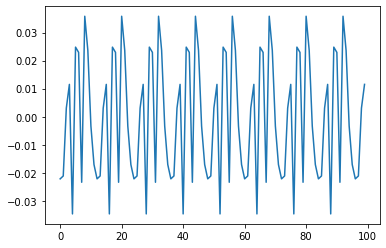

In [23]:
# seasonal 성분은 반복성 패턴을 보임

result.seasonal[:100].plot()
# -0.04 ~ 0.04 사이를 주기적으로 반복하는게 보임

<AxesSubplot:>

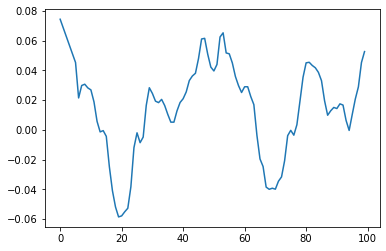

In [24]:
# trend 성분은 반복성 패턴을 보임

result.trend[:100].plot()
# seasonal data에 비해 뚜렷한 추세가 나타나지 않음
# 다만,연단위로 패턴을 보임

<AxesSubplot:>

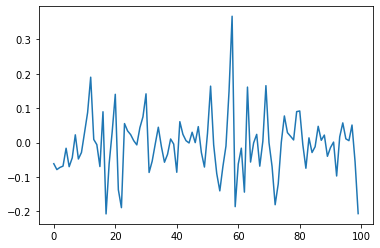

In [25]:
# resid 성분은 너무 빼곡하게 보여 다시 확인.

result.resid[:100].plot()
# 크게 변동폭을 보이는 건을 확인함

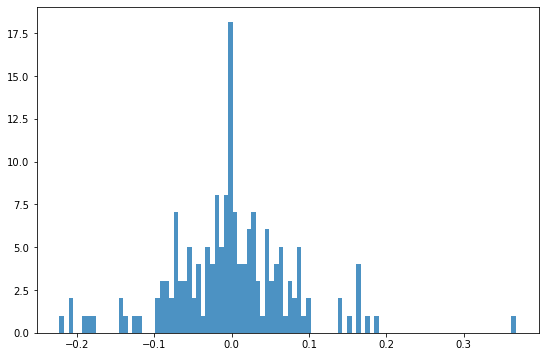

In [26]:
# Residual의 분포 확인
fig, ax = plt.subplots(figsize=(9,6))
_ = plt.hist(result.resid, 100, density=True, alpha=0.8)

In [28]:
# 평균과 표준편차 출력
mu, std = result.resid.mean(), result.resid.std()

print("평균:", mu, "표준편차:", std)

# 3-sigma(표준편차)를 기준으로 세밀하게 판단
print("이상치 개수:", len(result.resid[(result.resid > mu + 3*std)|(result.resid < mu - 3*std)]))

평균: -0.0008872120240870249 표준편차: 0.0791909092499733
이상치 개수: 1


#### 4) How you would prevent the same problems in the future

데이터 품질 관점에서 abnormal data는 입력 시에 발견되는 것이 데이터 비용 차원에서 최선의 방법입니다.
이에 따라, 추가적으로 향후에 딥러닝 모델을 학습함에 있어, 이상치에 대한 정답지를 자동으로 만드는 segmenation 알고리즘을 정리했습니다.
데이터 구성은 정상 데이터를 train data, 이상 데이터 및 정상 데이터를 test data로 활용할 수 있습니다.

train, test data를 바탕으로 anomaly detection 모델을 개발할 때, supervised learning 내지는 semi-supverised learning에 활용할 수 있다고 생각합니다.


In [29]:
# 정상 데이터, 이상치 

def abnormal_detection(dataframe):
    df_temp = dataframe.iloc[:, 1:].copy()

    for i in range(len(dataframe)):
        temp = list(dataframe.columns[1:])
        x = dataframe.iloc[i, 1:]
        min99, max99 = cl_99(x)
        hash_map = {}
    
        for j in x.keys():
            if x[j] < min99 or x[j] > max99:
                hash_map[j] = x[j] 
                
        for k in list(hash_map):
            temp.remove(k)

        # prodcut_id에 따른 정상 데이터(train), 이상치(test)에 따라 train, test 데이터 구분
        globals()['X_train_' + str(dataframe['product_id'][i])] = df_temp.loc[i, temp]
        globals()['X_test_' + str(dataframe['product_id'][i])] = df_temp.loc[i, list(hash_map)]

감사합니다.